<a href="https://colab.research.google.com/github/rysullivan54/QuarkNet/blob/main/Sullivan_HR_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook should be used after the *Introduction to Stars* lecture.

#The Hertzsprung–Russell diagram#
The Hertzsprung–Russell diagram (abbreviated as H–R diagram, HR diagram or HRD) is a scatter plot of stars showing the relationship between the stars' absolute magnitudes or luminosities and their stellar classifications or effective temperatures. The diagram was created independently in 1911 by Ejnar Hertzsprung and by Henry Norris Russell in 1913, and represented a major step towards an understanding of stellar evolution.

For further reading see https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram

**Imports some software packages we'll use**



In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager as font_manager
import os

**import Hipparcus catalogue data**

In [11]:
# Mount local drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# this code it used to initially load the catalogue. After it has been run once it does not need to be run again
from google.colab import files
uploaded = files.upload()

Saving hipparcos_voidmain_CAT.csv to hipparcos_voidmain_CAT (2).csv


In [4]:
# import the catalogue
stars = pd.read_csv('hipparcos_voidmain_CAT.csv')

In [5]:
# Preview data
stars.head(5)

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [6]:
# Number of stars in dataset
stars.shape

(118218, 78)

**Create a subset of the data with the apparent magnitude, parallax, and color of the stars. *Eliminate any stars without a parallax listed.***

- Change the [["Plx"]>0] to look at stars that are closer to Sol.
- Remember the larger the parallax the closer the star
- Try >5 and >15.

In [36]:
# New_data = stars.loc[:,["Vmag", "Plx", "B-V"]][stars.loc[:,["Vmag", "Plx", "B-V"]]["Plx"]>0]
# New_data = stars.loc[:,["Vmag", "Plx", "B-V"]][stars.loc[:,["Vmag", "Plx", "B-V"]]["Plx"]>5]
# New_data = stars.loc[:,["Vmag", "Plx", "B-V"]][stars.loc[:,["Vmag", "Plx", "B-V"]]["Plx"]>15]

In [54]:
# Input the maximum distance in lightyears for stars in your diagram
distmax = input("Enter the maximum dist for stars in your HR diagram ")
distmax = float(distmax)
paramax = (1000/(distmax))/3.26156
New_data = stars.loc[:,["Vmag", "Plx", "B-V"]][stars.loc[:,["Vmag", "Plx", "B-V"]]["Plx"]>paramax]

Enter the maximum dist for stars in your HR diagram 10


In [55]:
# Preview data
New_data.head(5)

,Vmag,Plx,B-V
56,8.27,33.89,0.863
67,8.79,31.80,0.940
111,10.76,31.35,1.384
168,9.24,63.03,1.390
170,5.80,80.63,0.690


In [56]:
# How does the number of data points change as we increase the parallax?
New_data.shape

(2811, 3)

In [57]:
# Add the distace calculations
New_data['dispc'] = 1000/New_data["Plx"]
New_data['disly'] = 1000/New_data["Plx"]*3.26156
New_data['disau'] = 1000/New_data["Plx"]*3.26156*149597870.700
New_data['TempK'] = 4600/(1/(0.92*New_data['B-V']+1.7)+1/(0.92*New_data['B-V']+0.62))
New_data.head(5)

,Vmag,Plx,B-V,dispc,disly,disau,TempK
56,8.27,33.89,0.863,29.507229,96.239599,1.439724e+10,4150.866583
67,8.79,31.80,0.940,31.446541,102.564780,1.534347e+10,4325.807286
111,10.76,31.35,1.384,31.897927,104.037002,1.556371e+10,5320.916041
168,9.24,63.03,1.390,15.865461,51.746153,7.741114e+09,5334.235900
170,5.80,80.63,0.690,12.402332,40.450949,6.051376e+09,3754.360481


In [58]:
# Eliminate data with negative B-V
New_data2 = New_data[New_data["B-V"] > 0]
New_data2.head()

,Vmag,Plx,B-V,dispc,disly,disau,TempK
56,8.27,33.89,0.863,29.507229,96.239599,1.439724e+10,4150.866583
67,8.79,31.80,0.940,31.446541,102.564780,1.534347e+10,4325.807286
111,10.76,31.35,1.384,31.897927,104.037002,1.556371e+10,5320.916041
168,9.24,63.03,1.390,15.865461,51.746153,7.741114e+09,5334.235900
170,5.80,80.63,0.690,12.402332,40.450949,6.051376e+09,3754.360481


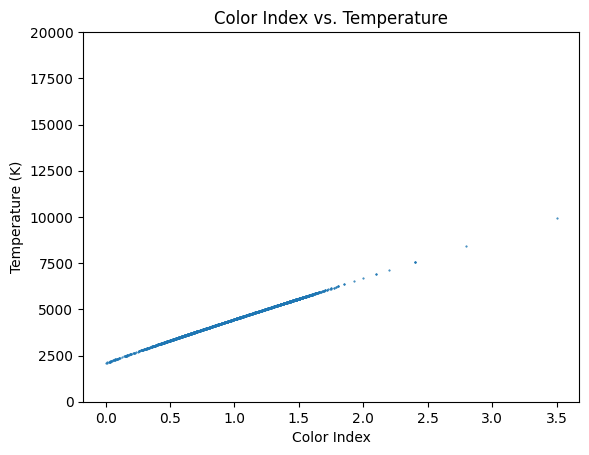

In [63]:
# Scatter plot the data to show the relationship between color index (B-V) and Temperature
plt.scatter(New_data2['B-V'], New_data2['TempK'], s=1, marker = '.')
plt.ylim(0,20000)
plt.title("Color Index vs. Temperature")
plt.xlabel("Color Index")
plt.ylabel("Temperature (K)")
plt.grid(False);

When there is less than 5% of missing data, the missing data approach is arbitrary.

We will delete the rows with missing data. This will not harm our objectives, since the percentage of missing data is less than 1%.

In [60]:
# Check percentage of missing data
percentage_of_missing_data = 100*(New_data.isnull().sum()/len(New_data["Plx"])) # Does the percentage of missing data change?
print(percentage_of_missing_data)

Vmag     0.000000
Plx      0.000000
B-V      2.134472
dispc    0.000000
disly    0.000000
disau    0.000000
TempK    2.134472
dtype: float64


Compute the absolute magnitude using
-      **M = m + 5 log(p + 1)**
-where **M** is the absolute magnitude, **m** is the apparent magnitude, and **p** is the parallax

In [61]:
# Compute the absolute magnitude
Magnitude_B_V = np.array(New_data["B-V"], dtype=float)
Magnitude_B_V2 = Magnitude_B_V.tolist()
apparent_magnitude = np.array(New_data["Vmag"], dtype=float)
parallax = np.array(New_data["Plx"], dtype=float)
dispc = 1/parallax*1000
absolute_Magnitude = apparent_magnitude-5*np.log10(dispc/10)
absolute_Magnitude2 = absolute_Magnitude.tolist()

**Create the actual HR diagram**
- Include Sol as a reference
- You can add more reference stars by uncommenting their lines

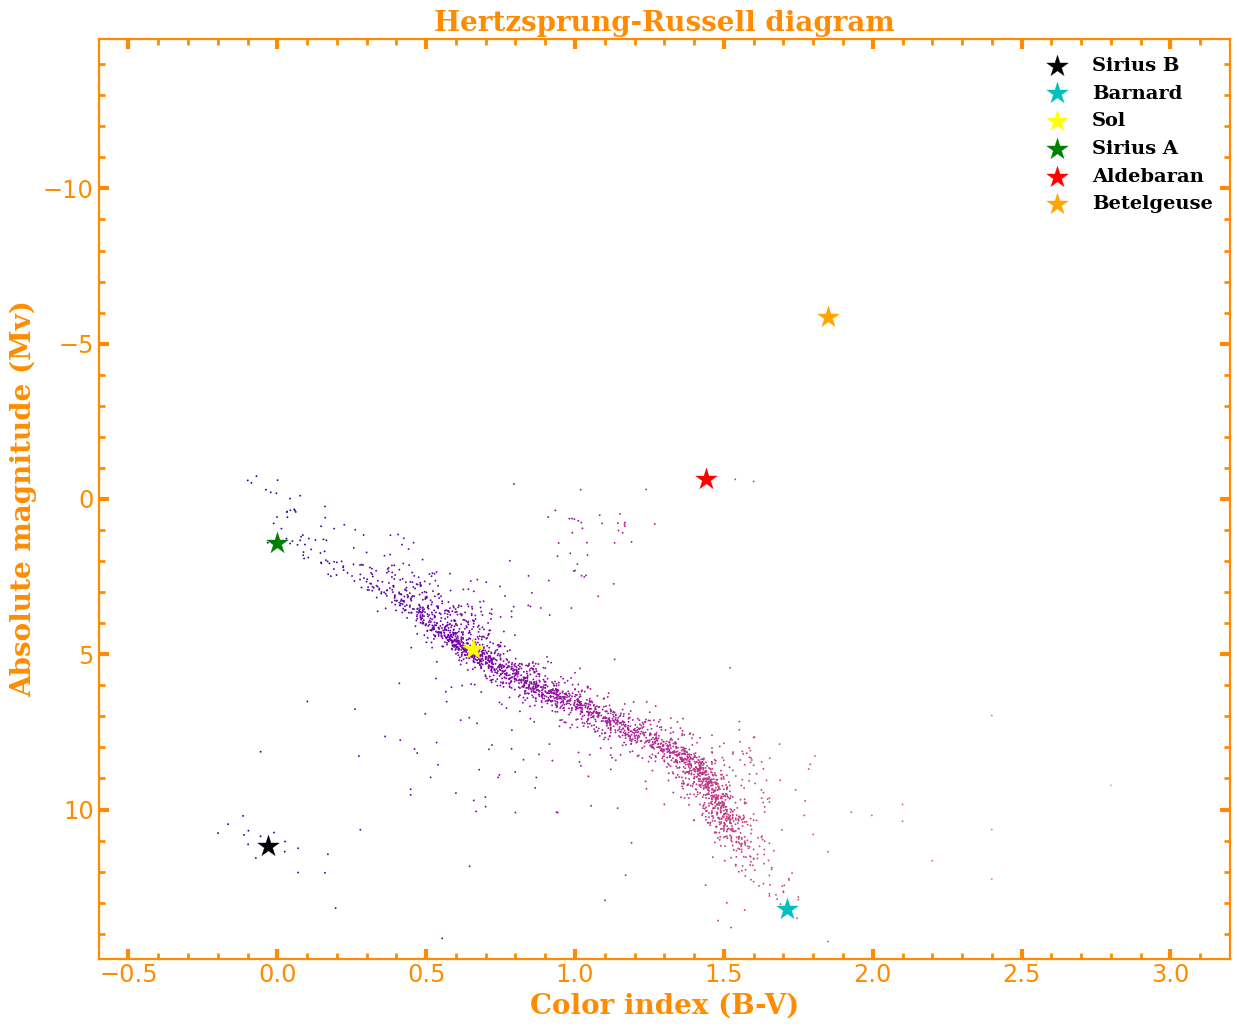

In [62]:
# Setting frame fonts
Font1 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 20}
Font2 = {"family": "serif", "weight": "bold", "color": "darkorange", "size": 20}
Font3 = {"family": "serif", "weight": "bold", "style": "normal", "size": 14}
# Create main plot
fig, ax = plt.subplots(figsize=(12.5,10.4))
ax.scatter(Magnitude_B_V, absolute_Magnitude, c=Magnitude_B_V,  cmap = "plasma", marker = '.', s = 7, linewidth = 0.01)
# Reference stars
ax.scatter(x = -0.03, y = 11.18, c = "black", marker = '*', s = 270, linewidth = 0.2, label = "Sirius B")
ax.scatter(x = 1.713, y = 13.21, c = "c", marker = '*', s = 270, linewidth = 0.2, label = "Barnard")
ax.scatter(x = 0.656, y = 4.83, c = "yellow", marker = '*', s = 270, linewidth = 0.2, label = "Sol")
ax.scatter(x = 0, y = 1.42, c = "green", marker = '*', s = 270, linewidth = 0.2, label = "Sirius A")
ax.scatter(x = 1.44, y = -0.641, c = "red", marker = '*', s = 270, linewidth = 0.2, label = "Aldebaran")
ax.scatter(x = 1.85, y = -5.85, c = "orange", marker = '*', s = 270, linewidth = 0.2, label = "Betelgeuse")
plt.xlabel("Color index (B-V)", fontdict = Font1)
plt.ylabel("Absolute magnitude (Mv)", fontdict = Font1)
plt.title("Hertzsprung-Russell diagram", fontdict = Font2)
plt.xlim(-0.6, 3.2)
plt.ylim(14.8, -14.8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='darkorange', labelsize='xx-large', top = True, right = True)
ax.tick_params(which='major', direction = "in", color='darkorange', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='darkorange', width = 2, top = True, right = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color("darkorange")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.6)
Color_BC = plt.gca()
Color_BC.set_facecolor("white")
Color_BC.patch.set_alpha(1)
plt.legend(frameon = False, prop = Font3, labelcolor = "black")
plt.tight_layout()
plt.show()


# Questions

1. What does the B-V color index represent?
2. What is the difference between apparent magnitude and absolute magnitude?
3. What is the Sun's B-V color index? How does it compare to the other reference stars?
4. Build a table for the reference stars, including Name, Star Type, Color Index, and Absolute Magnitude.
5. What else can you determine from an HR diagram?



